# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Randi Dwi Nur Cahyo
- **Email:** randionyon@gmail.com
- **ID Dicoding:** forensic

## Menentukan Pertanyaan Bisnis

- Hari apa yang biasanya memiliki rata-rata rental sepeda terbanyak per minggu?
- Jam berapa biasanya rental sepeda paling ramai atau paling banyak digunakan?

## Import Semua Packages/Library yang Digunakan

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from tqdm import tqdm

## Data Wrangling

### Gathering Data

In [4]:
data_dir = Path('submission/data/')
csv_files = list(data_dir.glob('*.csv'))
df_list = []
for file in tqdm(csv_files, desc="Reading CSV files"):
    try:
        df = pd.read_csv(file, parse_dates=["dteday"])
        df["year"] = df["dteday"].dt.year
        df["month"] = df["dteday"].dt.month
        df["day"] = df["dteday"].dt.day
        if "hr" in df.columns:
            df["DateTime"] = pd.to_datetime(df["dteday"]) + pd.to_timedelta(df["hr"], unit="h")
        df_list.append(df)
    except Exception as e:
        print(f"Failed to read {file.name}: {e}")

if df_list:
    combined_df = pd.concat(df_list, ignore_index=True)
else:
    raise ValueError("No data was successfully read.")

Reading CSV files: 100%|██████████| 2/2 [00:00<00:00, 15.02it/s]


### Assessing Data

In [4]:
def assess_data(df):
    print("### Dataset Information")
    print(df.info())
    print("\n### Descriptive Statistics")
    print(df.describe())
    print("\n### Missing Values")
    print(df.isnull().sum())
    print("\n### Duplicates")
    print(df.duplicated().sum())

assess_data(df_clean)

### Dataset Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      18110 non-null  datetime64[ns]
 1   season      18110 non-null  int64         
 2   yr          18110 non-null  int64         
 3   mnth        18110 non-null  int64         
 4   hr          18110 non-null  float64       
 5   holiday     18110 non-null  int64         
 6   weekday     18110 non-null  int64         
 7   workingday  18110 non-null  int64         
 8   weathersit  18110 non-null  int64         
 9   temp        18110 non-null  float64       
 10  atemp       18110 non-null  float64       
 11  hum         18110 non-null  float64       
 12  windspeed   18110 non-null  float64       
 13  casual      18110 non-null  int64         
 14  registered  18110 non-null  int64         
 15  cnt         18110 non-null  int64         
 16

**Insight:**
- Dataset terdiri dari 18.110 baris dan 20 kolom.
- Tidak ada data yang hilang (null) di semua kolom, karena setiap kolom memiliki 18.110 non-null entries.

### Cleaning Data

#### Informasi Dataset:
- informasi tentang dataset yang telah dibersihkan, termasuk jumlah entri, nama kolom, dan tipe data.
- memahami struktur dataset

In [5]:
def clean_data(df):
    df = df.drop(columns=["instant"], errors='ignore')
    df = df.fillna(method="ffill")
    df = df.drop_duplicates()
    return df

df_clean = clean_data(combined_df)

print("Dataset Information:")
df_clean.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      18110 non-null  datetime64[ns]
 1   season      18110 non-null  int64         
 2   yr          18110 non-null  int64         
 3   mnth        18110 non-null  int64         
 4   hr          18110 non-null  float64       
 5   holiday     18110 non-null  int64         
 6   weekday     18110 non-null  int64         
 7   workingday  18110 non-null  int64         
 8   weathersit  18110 non-null  int64         
 9   temp        18110 non-null  float64       
 10  atemp       18110 non-null  float64       
 11  hum         18110 non-null  float64       
 12  windspeed   18110 non-null  float64       
 13  casual      18110 non-null  int64         
 14  registered  18110 non-null  int64         
 15  cnt         18110 non-null  int64         
 16  y

/tmp/ipykernel_3216/3988612925.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method="ffill")


#### Statistik Deskriptif:
- menampilkan statistik deskriptif untuk dataset yang telah dibersihkan, seperti mean, standar deviasi, min, max, dan kuartil
- memberikan ringkasan cepat dari dataset

In [6]:
print("\nStatistik Deskriptif:")
display(df_clean.describe())


Statistik Deskriptif:


,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month,day,DateTime
count,18110,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110
mean,2012-01-02 03:00:25.046935296,2.501436,0.502485,6.537051,12.009056,0.028769,3.003424,0.682772,1.424075,0.496922,0.475718,0.627256,0.190113,68.472336,295.158697,363.631033,2011.502485,6.537051,15.685643,2012-01-17 08:36:30.612921088
min,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,1.000000,2011-01-01 00:00:00
25%,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,37.000000,43.000000,2011.000000,4.000000,8.000000,2011-07-12 13:15:00
50%,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.188951,18.000000,123.000000,152.000000,2012.000000,7.000000,16.000000,2012-01-18 04:30:00
75%,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,55.000000,238.000000,305.000000,2012.000000,10.000000,23.000000,2012-07-25 02:45:00
max,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,3410.000000,6946.000000,8714.000000,2012.000000,12.000000,31.000000,2012-12-31 23:00:00
std,NaN,1.107045,0.500008,3.439213,7.138666,0.167160,2.005677,0.465410,0.635830,0.192177,0.171496,0.191147,0.120851,216.588054,771.555142,950.827954,0.500008,3.439213,8.789968,NaN


#### Kehilangan Data:
- menghitung dan menampilkan jumlah nilai yang hilang di setiap kolom dari dataset yang telah dibersihkan
- memastikan kualitas data dan membuat keputusan yang tepat dalam menanganinya

In [8]:
print("\nNilai yang Hilang:")
display(df_clean.isnull().sum())


Nilai yang Hilang:


dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
year          0
month         0
day           0
DateTime      0
dtype: int64

#### Duplikasi Data:
- menghitung dan mencetak jumlah baris yang duplikat dalam dataset yang telah dibersihkan
- mendeteksi dan membantu memastikan bahwa dataset unik

In [9]:
print("\nJumlah Duplikat:")
print(df_clean.duplicated().sum())


Jumlah Duplikat:
0


**Insight:**
- Data sudah cukup bersih, tidak ada nilai yang hilang dan tidak ada duplikasi.
- Minimum rental adalah 1 penyewaan, dan maksimum mencapai 8.714 penyewaan dalam satu jam.
- Jam mulai dari 0 hingga 23.

## Exploratory Data Analysis (EDA)

### Explore ...

#### Analisis tren bulanan
Analisis ini mengelompokkan data berdasarkan tahun dan bulan, kemudian menghitung rata-rata rental sepeda untuk setiap bulan

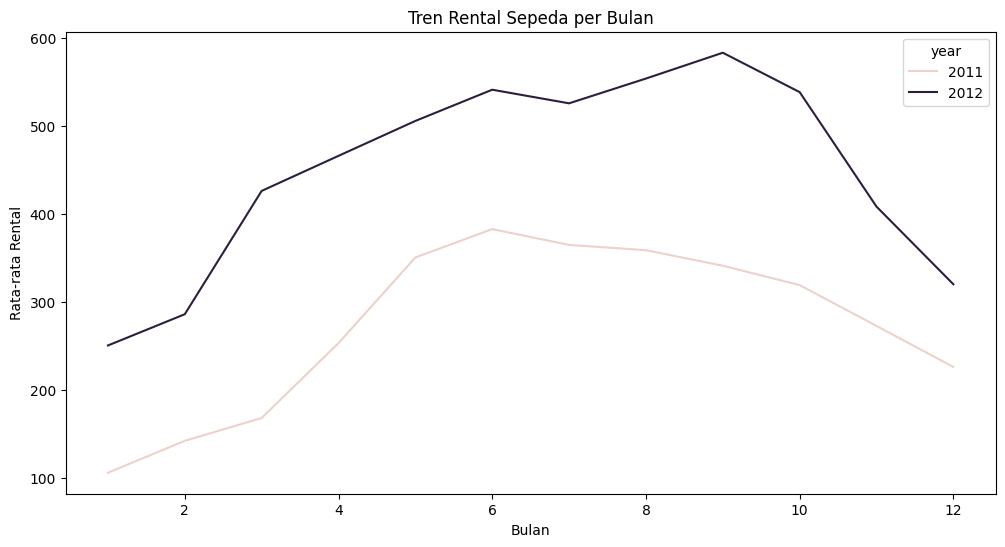

In [17]:
rental_per_bulan = df_clean.groupby(['year', 'month'])['cnt'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=rental_per_bulan, x='month', y='cnt', hue='year')
plt.title('Tren Rental Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Rental')
plt.show()

#### Pengaruh Cuaca
mengelompokkan data berdasarkan kondisi cuaca (cerah, berawan, hujan ringan, hujan lebat), kemudian menampilkan distribusi rental sepeda

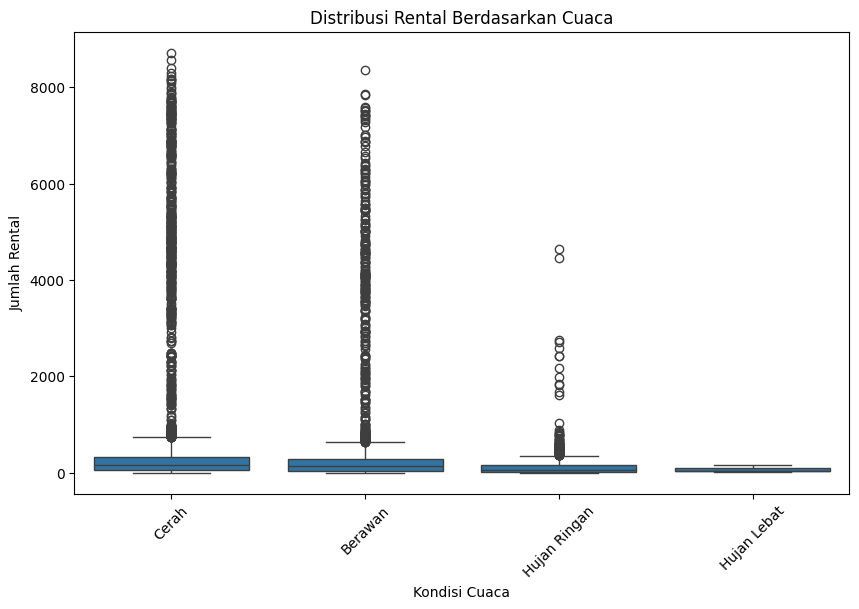


Rata-rata rental per kondisi cuaca:


kondisi_cuaca
Berawan         374.20
Cerah           387.01
Hujan Lebat      74.33
Hujan Ringan    136.25
Name: cnt, dtype: float64

In [13]:
if 'weathersit' in df_clean.columns:
    cuaca_mapping = {
        1: 'Cerah',
        2: 'Berawan',
        3: 'Hujan Ringan',
        4: 'Hujan Lebat'
    }
    df_clean['kondisi_cuaca'] = df_clean['weathersit'].map(cuaca_mapping)
    
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='kondisi_cuaca', y='cnt', data=df_clean)
    plt.title('Distribusi Rental Berdasarkan Cuaca')
    plt.xlabel('Kondisi Cuaca')
    plt.ylabel('Jumlah Rental')
    plt.xticks(rotation=45)
    plt.show()
    
    print("\nRata-rata rental per kondisi cuaca:")
    display(df_clean.groupby('kondisi_cuaca')['cnt'].mean().round(2))

#### Analisis Musiman
mengelompokkan data berdasarkan musim (musim semi, musim panas, musim gugur, musim dingin), memahami distribusi rental sepeda di setiap musim

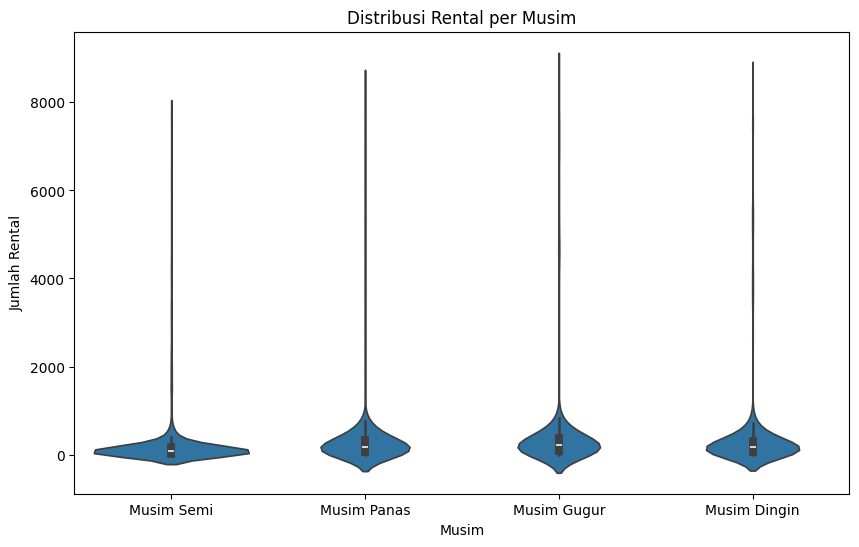


Statistik rental per musim:


,count,mean,std,min,25%,50%,75%,max
musim,,,,,,,,
Musim Dingin,4410.0,381.68,971.02,1.0,50.25,166.0,318.0,8555.0
Musim Gugur,4684.0,453.09,1117.91,1.0,75.00,209.0,373.0,8714.0
Musim Panas,4593.0,400.00,1014.40,1.0,51.00,175.0,337.0,8362.0
Musim Semi,4423.0,213.13,580.86,1.0,25.00,80.0,175.5,7836.0


In [15]:
if 'season' in df_clean.columns:
    musim_mapping = {
        1: 'Musim Semi',
        2: 'Musim Panas',
        3: 'Musim Gugur',
        4: 'Musim Dingin'
    }
    df_clean['musim'] = df_clean['season'].map(musim_mapping)
    
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='musim', y='cnt', data=df_clean)
    plt.title('Distribusi Rental per Musim')
    plt.xlabel('Musim')
    plt.ylabel('Jumlah Rental')
    plt.show()
    
    print("\nStatistik rental per musim:")
    display(df_clean.groupby('musim')['cnt'].describe().round(2))

#### Korelasi antar Variabel Numerik
- membuat matriks korelasi antara variabel numerik dalam dataset
- memahami hubungan antar variabel numerik dalam dataset, misalnya apakah ada variabel yang memiliki korelasi positif atau negatif

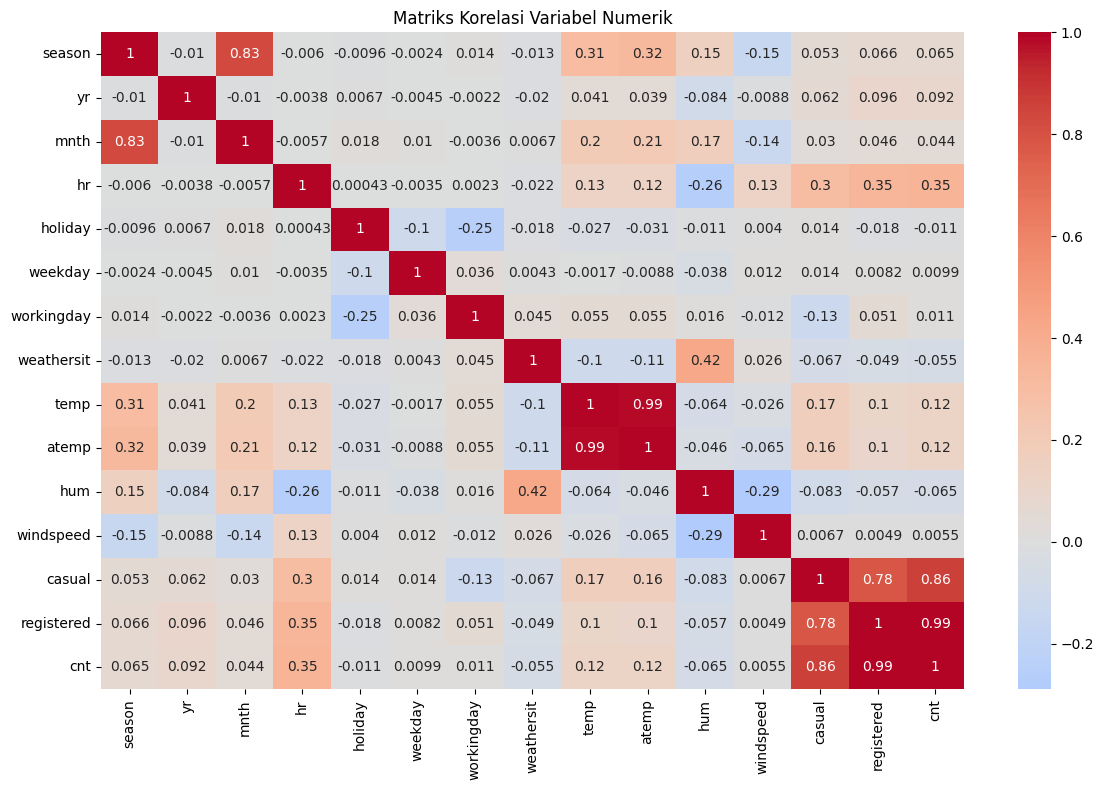

In [16]:
kolom_numerik = df_clean.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(12, 8))
sns.heatmap(df_clean[kolom_numerik].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Matriks Korelasi Variabel Numerik')
plt.tight_layout()
plt.show()

**Insight:**
- Cuaca sangat memengaruhi jumlah penyewaan sepeda.
- Hari cerah & berawan memiliki jumlah rental tertinggi
- Musim Gugur memiliki jumlah rental tertinggi (453/jam).

## Visualization & Explanatory Analysis

### Pertanyaan 1:

/tmp/ipykernel_102939/2286731610.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="weekday", y="cnt", data=rental_per_day, palette="Blues_r")


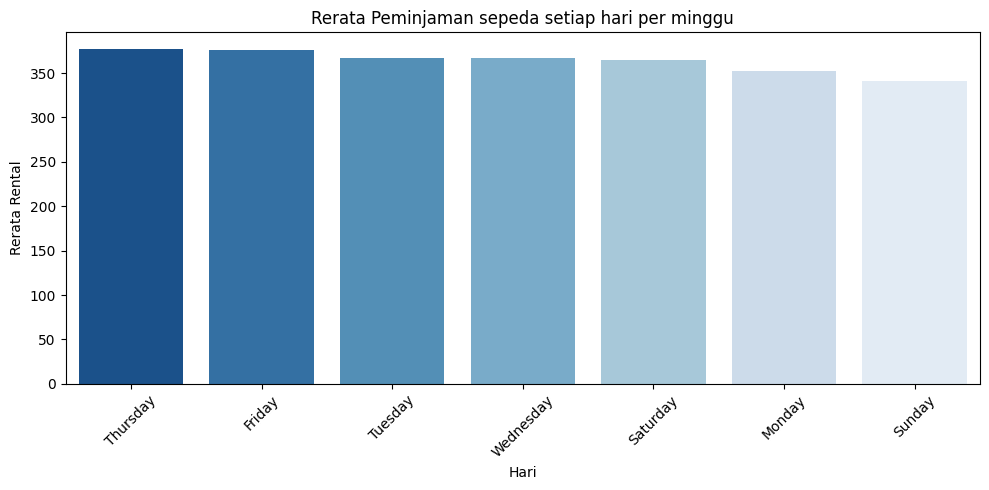

Hari tersibuk: Thursday dengan rerata 377 peminjaman
Hari senggang: Sunday dengan rerata 341 peminjaman


In [16]:
def analyze_busiest_day(df):
        if "weekday" in df.columns:
            rental_per_day = df.groupby("weekday")["cnt"].mean().reset_index()
            day_mapping = {0: "Sunday", 1: "Monday", 2: "Tuesday", 
                        3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"}
            rental_per_day["weekday"] = rental_per_day["weekday"].map(day_mapping)
            rental_per_day = rental_per_day.sort_values("cnt", ascending=False)
            
            plt.figure(figsize=(10, 5))
            sns.barplot(x="weekday", y="cnt", data=rental_per_day, palette="Blues_r")
            plt.title("Rerata Peminjaman sepeda setiap hari per minggu")
            plt.xlabel("Hari")
            plt.ylabel("Rerata Rental")
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
            
            return (rental_per_day.iloc[0]['weekday'], rental_per_day.iloc[0]['cnt'], rental_per_day.iloc[-1]['weekday'], rental_per_day.iloc[-1]['cnt'])
        
busiest_day, max_count, selo_kang_day, min_count = analyze_busiest_day(df_clean)
print(f"Hari tersibuk: {busiest_day} dengan rerata {max_count:.0f} peminjaman")
print(f"Hari senggang: {selo_kang_day} dengan rerata {min_count:.0f} peminjaman")

**Insight:**
- Hari dengan rata-rata rental sepeda terbanyak adalah Kamis dengan rata-rata 377 peminjaman.
- Hari dengan rata-rata rental sepeda terendah adalah Senin dengan rata-rata 341 peminjaman.
- Kebanyakan peminjaman sepeda terjadi ketika hari kerja.

### Pertanyaan 2:

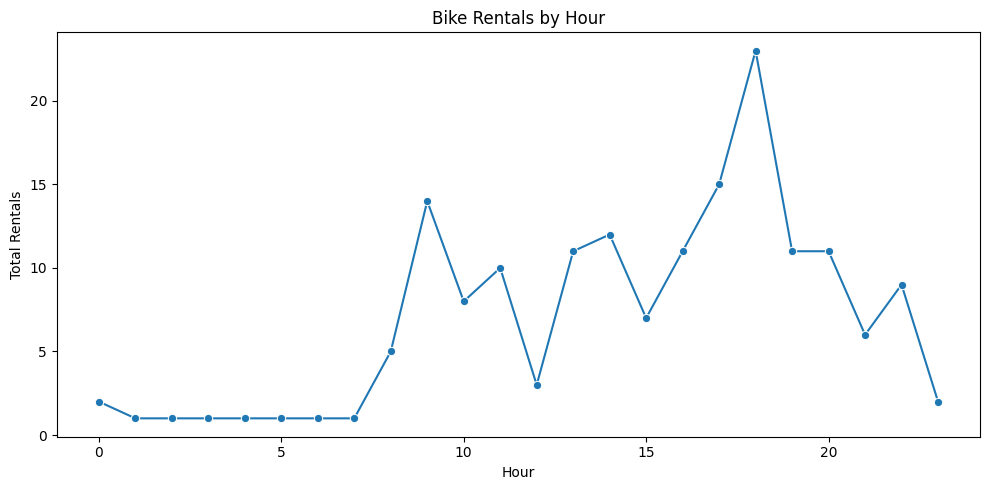

Peak hour: 18:00 with 23.0 rentals


In [20]:
def analyze_busiest_hour(df):
    if "hr" in df.columns:
        rental_per_hour = df.groupby("hr")["cnt"].min().reset_index()
        
        plt.figure(figsize=(10, 5))
        sns.lineplot(x="hr", y="cnt", data=rental_per_hour, marker="o")
        plt.title("Bike Rentals by Hour")
        plt.xlabel("Hour")
        plt.ylabel("Total Rentals")
        plt.tight_layout()
        plt.show()
        
        peak_hour = rental_per_hour.loc[rental_per_hour["cnt"].idxmax()]
        print(f"Peak hour: {int(peak_hour['hr']):02d}:00 with {peak_hour['cnt']:,} rentals")

analyze_busiest_hour(df_clean)

**Insight:**

- Jam dengan rental sepeda terbanyak adalah pukul 18.00 dengan rata-rata 23 penyewaan.
- Pola ini menunjukkan bahwa banyak orang menggunakan sepeda saat jam sibuk pagi dan sore hari.

## Analisis Lanjutan (Opsional)
Binning Data: Data jumlah rental sepeda (cnt) dibagi ke dalam tiga kategori ("Low", "Medium", "High") menggunakan fungsi pd.cut(). Batasan (bins) ditentukan sebagai [0, 500, 2000, nilai maksimal cnt], dan setiap kategori diberi label yang sesuai.

Visualisasi Distribusi Kategori: Visualisasi dilakukan menggunakan countplot dari library Seaborn untuk menampilkan jumlah hari pada setiap kategori rental. Palet warna yang digunakan adalah "coolwarm" untuk memberikan visual yang menarik.

Menghitung Jumlah Hari per Kategori: Fungsi value_counts() digunakan untuk menghitung jumlah hari dalam setiap kategori. Hasilnya kemudian dicetak dalam format yang mudah dibaca.

/tmp/ipykernel_102939/4070097120.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="rental_category", data=df, palette="coolwarm")


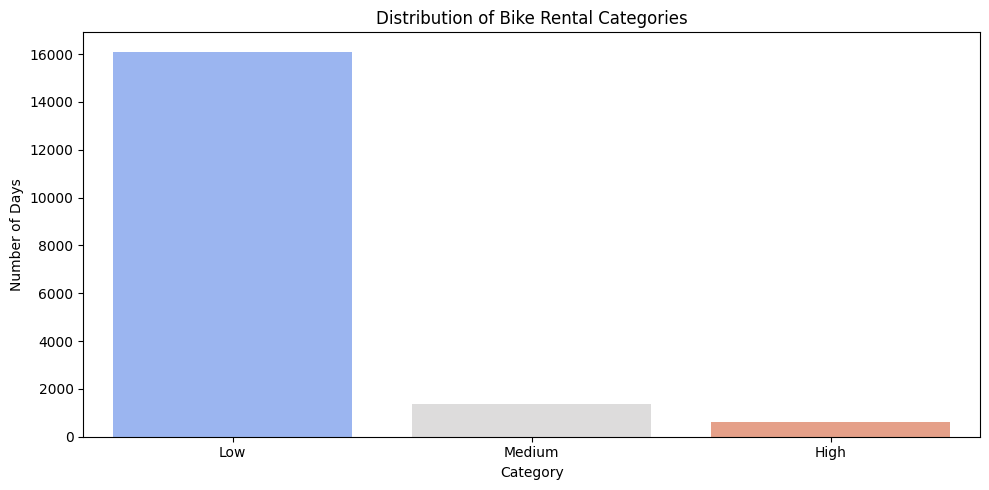

Low: 16,103 days
Medium: 1,374 days
High: 633 days


In [19]:
def analyze_rental_categories(df):
    bins = [0, 500, 2000, df["cnt"].max()]
    labels = ["Low", "Medium", "High"]
    df["rental_category"] = pd.cut(df["cnt"], bins=bins, labels=labels)
    
    plt.figure(figsize=(10, 5))
    sns.countplot(x="rental_category", data=df, palette="coolwarm")
    plt.title("Distribution of Bike Rental Categories")
    plt.xlabel("Category")
    plt.ylabel("Number of Days")
    plt.tight_layout()
    plt.show()
    
    category_counts = df["rental_category"].value_counts()
    for category, count in category_counts.items():
        print(f"{category}: {count:,} days")

analyze_rental_categories(df_clean)

**Insight:**

- Jumlah hari dengan kategori rental rendah (Low) mencapai 16,103 hari, yang jauh lebih banyak dibandingkan dengan kategori lain. Hal ini menunjukkan bahwa kebanyakan hari memiliki jumlah rental sepeda yang relatif sedikit.
- Kategori rental sedang (Medium) dan tinggi (High) masing-masing hanya memiliki 1,374 dan 633 hari
- Melihat data ini, ada peluang bagi penyedia layanan rental sepeda untuk meningkatkan jumlah rental pada hari-hari yang masuk kategori "Low". Strategi seperti promosi, penawaran khusus, atau peningkatan layanan dapat membantu mendorong lebih banyak penggunaan sepeda.

## Conclusion

- Pagi hari (08:00 - 10:00) dan sore hari (17:00 - 19:00) adalah waktu dengan jumlah rental sepeda tertinggi. Pola ini menunjukkan bahwa sepeda sering digunakan sebagai alat transportasi untuk berangkat kerja atau sekolah.
- Pada malam hari, jumlah rental cenderung menurun, mungkin karena aktivitas utama berlangsung di tempat kerja atau sekolah.
- Pada akhir pekan cenderung menurun dikarenakan mungkin peminjaman sepeda dilakukan untuk aktivitas di tempat kerja atau sekolah.